In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
# convert Sex column to one-hot encoding with columns M, F, and I
df["M"] = df["Sex"].apply(lambda x: 1 if x == "M" else 0)
df["F"] = df["Sex"].apply(lambda x: 1 if x == "F" else 0)
df["I"] = df["Sex"].apply(lambda x: 1 if x == "I" else 0)

In [6]:
# delete first column
df = df.drop("Sex", axis=1)

In [7]:
# Select columns to normalize
columns_to_normalize = df.columns.difference(["M", "F", "I", "Rings"])

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,-5.834718e-16,1.000120,-3.739154,-0.616198,0.174951,0.757903,2.423480
Diameter,4177.0,-3.027929e-16,1.000120,-3.556267,-0.583316,0.172519,0.726798,2.440025
Height,4177.0,3.912493e-16,1.000120,-3.335953,-0.586208,0.011563,0.609334,23.683287
Whole weight,4177.0,9.185853e-17,1.000120,-1.686092,-0.789758,-0.059638,0.661305,4.072271
Shucked weight,4177.0,-1.020650e-17,1.000120,-1.614731,-0.781159,-0.105289,0.642673,5.085388
Viscera weight,4177.0,2.704723e-16,1.000120,-1.643173,-0.794642,-0.087532,0.660635,5.286500
Shell weight,4177.0,2.976897e-16,1.000120,-1.705134,-0.781909,-0.034708,0.647832,5.504642
Rings,4177.0,9.933684e+00,3.224169,1.000000,8.000000,9.000000,11.000000,29.000000
M,4177.0,3.658128e-01,0.481715,0.000000,0.000000,0.000000,1.000000,1.000000
F,4177.0,3.129040e-01,0.463731,0.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
# fit a multiple linear regression model
X = df.drop(["Rings"], axis=1)
y = df["Rings"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_

LinearRegression()

In [10]:
# predict on test set, calculate RMSE
y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 2.187416


/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_

In [11]:
# fit an Ada-Boosted Decision Tree Regressor model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

abr = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=10),
    n_estimators=50,
    learning_rate=1.0,
    loss="linear",  # "linear", "square", "exponential
    random_state=42,
)

abr.fit(X_train, y_train)


/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  random_state=42)

In [12]:
# predict on test set, calculate RMSE
y_pred = abr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 2.195712


/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_

In [13]:
# fit a neural network model
import torch
from torch import nn

if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )
        
    def forward(self, x):
        return self.model(x)
    
model = NeuralNet(X_train.shape[1]).to(device)

In [14]:
# wrap data in DataLoader
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(torch.tensor(X_train.values).float(), torch.tensor(y_train.values).float())
test_data = TensorDataset(torch.tensor(X_test.values).float(), torch.tensor(y_test.values).float())

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)



In [15]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [16]:
train_losses = []

def train(model, train_loader, loss_fn, optimizer):
    model.train()
    train_loss = 0
    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y.unsqueeze(1))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss += loss.item()
        
        if batch % 10 == 0:
            print("Batch %d, loss %f" % (batch, loss.item()))
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
            
test_losses = []
            
def test(model, test_loader, loss_fn):
    model.eval()
    with torch.no_grad():
        test_loss = 0
        for batch, (X, y) in enumerate(test_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y.unsqueeze(1))
            test_loss += loss.item()
            
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        print("Test loss %f" % (test_loss))

In [17]:
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(model, train_loader, loss_fn, optimizer)
    test(model, test_loader, loss_fn)
print("Done!")

Epoch 1
-------------------------------
Batch 0, loss 110.133224
Batch 10, loss 93.529556
Batch 20, loss 93.000313
Batch 30, loss 79.680603
Batch 40, loss 70.702736
Batch 50, loss 56.896008
Batch 60, loss 24.716650
Batch 70, loss 23.665768
Batch 80, loss 23.406960
Batch 90, loss 8.509052
Test loss 17.886868
Epoch 2
-------------------------------
Batch 0, loss 17.715178
Batch 10, loss 22.470272
Batch 20, loss 12.709365
Batch 30, loss 8.247774
Batch 40, loss 8.293735
Batch 50, loss 6.638318
Batch 60, loss 104.844078
Batch 70, loss 5.876276
Batch 80, loss 4.177784
Batch 90, loss 7.574068
Test loss 5.558478
Epoch 3
-------------------------------
Batch 0, loss 5.289333
Batch 10, loss 3.170969
Batch 20, loss 2.580031
Batch 30, loss 4.447484
Batch 40, loss 4.384317
Batch 50, loss 4.903730
Batch 60, loss 5.219054
Batch 70, loss 3.661171
Batch 80, loss 5.828240
Batch 90, loss 3.484561
Test loss 5.268688
Epoch 4
-------------------------------
Batch 0, loss 4.107241
Batch 10, loss 3.936965
Bat

In [18]:
# predict on test set, calculate RMSE
y_pred = model(torch.tensor(X_test.values).float().to(device))
rmse = np.sqrt(mean_squared_error(y_test, y_pred.cpu().detach().numpy()))
print("RMSE: %f" % (rmse))

RMSE: 2.113594


/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikemykhaylov/.anaconda/envs/mat422/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


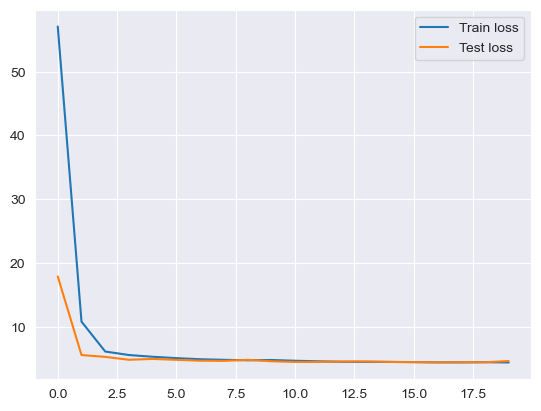

In [22]:
# plot train and test losses
plt.plot(train_losses, label="Train loss")
plt.plot(test_losses, label="Test loss")
plt.legend()
plt.savefig("loss.png")